# use RandomForestRegressor to select feature

In [1]:
!pip install pydot

In [2]:
import os

import pydot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

In [12]:
RF_PATH = "../data/curated/rf_data/"
TREE_GRAPH_DOT_PATH = os.path.join(RF_PATH, "tree.dot")
TREE_GRAPH_PNG_PATH = os.path.join(RF_PATH, "tree.png")
RANDOM_FOREST_SEED = 66
N_ESTIMATORS = 10

In [8]:
# set rf folder
if not os.path.exists(RF_PATH):
    os.mkdir(RF_PATH)

# Get Data

In [9]:
sa2_df = pd.read_csv(r"../data/curated/sa2_info.csv")

In [10]:
sa2_df.columns

Index(['Unnamed: 0', 'SA2', 'school_count', 'ERP_population', 'median_income',
       'metrobus_count', 'metrotrain_count', 'metrotram_count', 'regbus_count',
       'regcoach_count', 'regtrain_count', 'skybus_count', 'recr_count',
       'comm_count', 'deal_count', 'median_rent', 'cbd_dis'],
      dtype='object')

In [11]:
# set x y
x_col = ['school_count', 'ERP_population', 'median_income',
         'metrobus_count', 'metrotrain_count', 'metrotram_count',
         'regbus_count', 'regcoach_count', 'regtrain_count', 'skybus_count', 
         'recr_count', 'comm_count', 'deal_count']
y = sa2_df['median_rent']

# Random Forest Model

In [13]:
random_forest_model = RandomForestRegressor(n_estimators=N_ESTIMATORS,
                                            random_state=RANDOM_FOREST_SEED)
random_forest_model.fit(sa2_df[x_col], y)

RandomForestRegressor(n_estimators=10, random_state=66)

In [14]:
# Draw decision tree visualizing plot
random_forest_tree = random_forest_model. estimators_[5]
export_graphviz(random_forest_tree, out_file=TREE_GRAPH_DOT_PATH,
                feature_names=x_col, rounded=True, precision=1)
(random_forest_graph,) = pydot.graph_from_dot_file(TREE_GRAPH_DOT_PATH)
random_forest_graph.write_png(TREE_GRAPH_PNG_PATH)

**Random Forest Tree**

![tree.png](../data/curated/rf_data/tree.png)

# Calculate the importance of variables

Text(0.5, 1.0, 'Variable Importances')

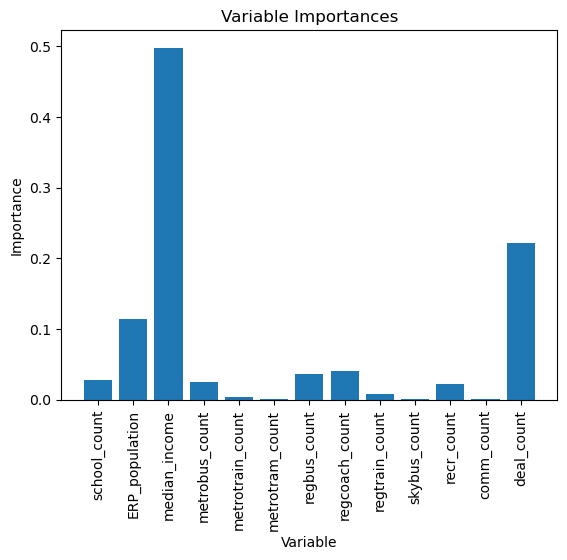

In [15]:
random_forest_importance = list(random_forest_model.feature_importances_)
random_forest_feature_importance = [(feature, round(importance, 8))
                                    for feature, importance in
                                    zip(x_col, random_forest_importance)]

random_forest_feature_importance = sorted(random_forest_feature_importance,
                                          key=lambda x: x[1], reverse=True)
plt.figure(3)
plt.clf()
importance_plot_x_values = list(range(len(random_forest_importance)))
plt.bar(importance_plot_x_values, random_forest_importance, 
        orientation='vertical')
plt.xticks(importance_plot_x_values, x_col, rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')

In [16]:
importance_dict = dict(zip(x_col, random_forest_importance))
sorted_data = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

In [17]:
for fea, var in sorted_data:
    print(f"{fea:<25}{var:.5f}")

median_income            0.49777
deal_count               0.22142
ERP_population           0.11345
regcoach_count           0.04032
regbus_count             0.03585
school_count             0.02759
metrobus_count           0.02570
recr_count               0.02196
regtrain_count           0.00805
metrotrain_count         0.00364
metrotram_count          0.00169
comm_count               0.00147
skybus_count             0.00109


**In summary, the top 3 importance feature is `median_income, deal_count,ERP_population`**